# Does changing the \_rate of a PoissonGroup actually change the rate?

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
%matplotlib inline
plt.viridis()
duration = 100000.*ms
dt = 10000. * ms

In [128]:
ratesmon = []
start_scope()
rate =  200 * Hz #np.random.randint(100, 200) * Hz
ratesmon.append(rate)
inp = PoissonGroup(1, rate)
@network_operation(dt=dt)
def change_stimulus():
    rate = np.random.randint(100, 200) * Hz
    ratesmon.append(rate)
    inp._rates = rate
spikemon = SpikeMonitor(inp)
run(duration)

(0, 100000.0)

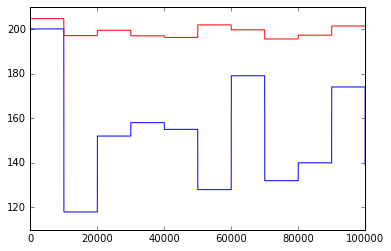

In [129]:
# rate evolution

empirical_rates = []
for t_lim in np.linspace(dt/ms, duration/ms, duration/dt)*ms:
    occurances_in_dt = np.count_nonzero([x if (t_lim-dt) <= x <t_lim else 0 for x in spikemon.t[:] ]) 
#     print occurances_in_dt
    empirical_rates.append(occurances_in_dt / (dt))
    
    
    
plt.plot(np.repeat(np.asarray(ratesmon), dt/ms))
plt.plot(np.repeat(np.asarray(empirical_rates), dt/ms), color='r')

plt.xlim([0, duration/ms])
# plt.ylim([50, 250])

In [130]:
print spikemon.num_spikes / (duration)
print ratesmon[0]

198.95 Hz
200. Hz


In [132]:
print np.mean(ratesmon)

152.272727273


(0, 100000.0)

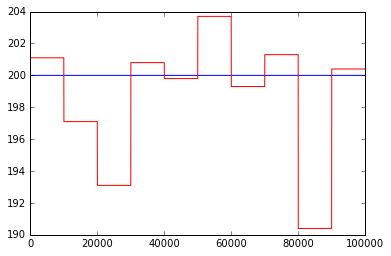

In [133]:
start_scope()

inp = PoissonGroup(1, ratesmon[0])
spikemon = SpikeMonitor(inp)
run(duration)
# rate evolution

empirical_rates = []
for t_lim in np.linspace(dt/ms, duration/ms, duration/dt)*ms:
    occurances_in_dt = np.count_nonzero([x if (t_lim-dt) <= x <t_lim else 0 for x in spikemon.t[:] ]) 
#     print occurances_in_dt
    empirical_rates.append(occurances_in_dt / (dt))
    
    
    
plt.plot(np.repeat(np.asarray(ratesmon[0]), duration/ms))
plt.plot(np.repeat(np.asarray(empirical_rates), dt/ms), color='r')

plt.xlim([0, duration/ms])
# plt.ylim([50, 250])

In [134]:
print spikemon.num_spikes / (duration)
print ratesmon[0]

198.7 Hz
200. Hz


# Answer? _No_, this is not the way to set a new rate